In [12]:
from app import palavras_tokenizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

caminho_pdf = r'C:\Users\jonat\Documents\GitHub\Avaliador_de_livros\Programa\TheLittlePrince.pdf'

df = pd.DataFrame(palavras_tokenizadas(caminho_pdf))
df

,Palavras,token
0,the,892
28,to,453
31,i,452
29,a,383
18,of,326
...,...,...
3023,tail,1
3022,serial,1
3021,yesterdaybased,1
3020,confirmed,1


In [2]:
!pip install matplotlib

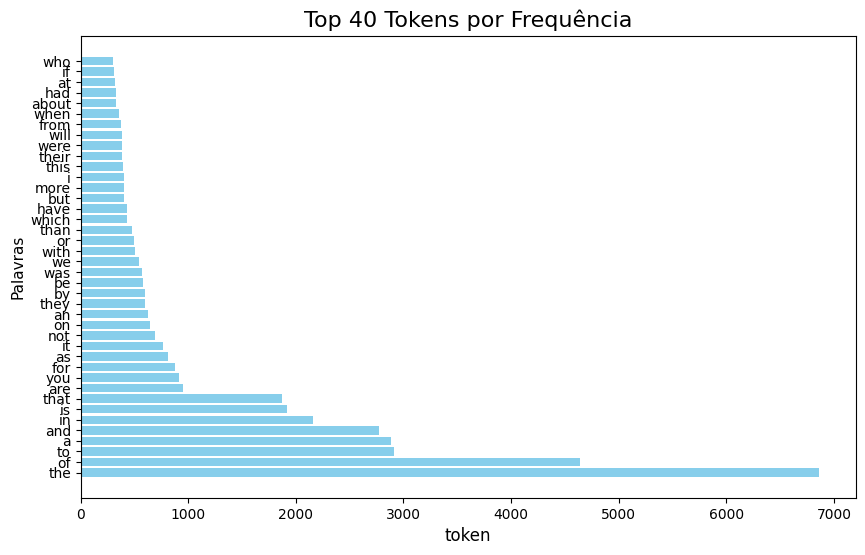

In [5]:
import matplotlib.pyplot as plt
def visualizar_tokens(df, top_n=10):

    # Seleciona os top N tokens
    df_top_n = df.head(top_n)

    # Cria o gráfico de barras horizontais
    plt.figure(figsize=(10, 6))
    plt.barh(df_top_n['Palavras'], df_top_n['token'], color='skyblue')

    # Adiciona títulos e rótulos
    plt.title(f'Top {top_n} Tokens por Frequência', fontsize=16)
    plt.xlabel('token', fontsize=12)
    plt.ylabel('Palavras', fontsize=11)
    
    # Exibe o gráfico
    plt.show()

visualizar_tokens(df, top_n=40)

In [6]:
quantidade_palavras = df["token"].sum()
f"O livro tem {quantidade_palavras} palavras no total."

'O livro tem 113421 palavras no total.'

In [5]:
quantidade_palavras_unitarias = df.shape[0]
vinte_porc = int(quantidade_palavras_unitarias * 0.2)
f"O total de 20% das palavras unitarias é {vinte_porc}"


'O total de 20% das palavras unitarias é 1043'

Porém 20% das palavras unitarias não reflete 20% das palavras que realmente aparecem no livro.

In [6]:
vinte_porc = int(quantidade_palavras * 0.2)
print(f"20% das palavras realmente são {vinte_porc} \nPorém nelas existem varias palavras repetidas")

20% das palavras realmente são 4714 
Porém nelas existem varias palavras repetidas


# Mas porque 20%
O **princípio de Pareto** será usado para avaliar quais palavras o leitor mais deve saber para conseguir ler o livro minimamente.
O Princípio diz que 80% da riqueza de seu país se concentrava nas mãos de 20% da população. Porém ja foi observado uma serie de correlações em varios campos. 

O objetivo é responder a pergunta 20% das palavras unitarias do livro correspondem a 80% das palavras escritas.

In [7]:
def soma_linhas_ate_alvo(dataframe, coluna, alvo):
    """
    Soma os valores de uma coluna em um DataFrame linha por linha até que a soma se aproxime de um valor alvo.

    Args:
        dataframe (pd.DataFrame): O DataFrame a ser usado.
        coluna (str): O nome da coluna para somar os valores.
        alvo (float): O valor alvo a ser aproximado.

    Returns:
        tuple: Uma tupla contendo a soma mais próxima do alvo e o índice da última linha somada.
    """

    soma_atual = 0
    indice_atual = 0
    melhor_soma = 0
    melhor_indice = 0

    for indice, linha in dataframe.iterrows():
        soma_atual += linha[coluna]

        if abs(soma_atual - alvo) < abs(melhor_soma - alvo):
            melhor_soma = soma_atual
            melhor_indice = indice

        if soma_atual >= alvo:
            break

    return melhor_soma, melhor_indice
w, indice = soma_linhas_ate_alvo(df,'token',vinte_porc)
print(f"{indice} palavras correspondem a 20% das palavas do livro({quantidade_palavras_unitarias} palavras repetidas).")
print(f"Então 20% das palavras quivalem a {(indice / quantidade_palavras_unitarias)*100:.2f}% das palavras unitárias({quantidade_palavras_unitarias})")


53 palavras correspondem a 20% das palavas do livro(5217 palavras repetidas).
Então 20% das palavras quivalem a 1.02% das palavras unitárias(5217)


Porque isso ocorreu?

Voltando para os dados, perceberemos que existe umas duzias de palavras unitárias que representam muito das palavras repetidas. 

Então se eu responder porque elas se repetem tanto, poderei filtrar melhor as palavras. 

In [8]:
df

,Palavras,token
26,the,1319
7,and,696
21,to,638
62,a,537
45,she,442
...,...,...
5212,joys,1
5213,rememberingher,1
5214,childlife,1
5215,happy,1


As 5 primeiras palavras são palavras simples, conectivos, artigos...

# Objetivo
O objetivo deste codigo é me ajudar a ler livros em inglês.
Bom é obvio que as palavras simples são exenciais para entender o livro, porém quero ter mais informações das palavras importantes para o contexto.

Vou remover as stopwords

In [9]:
import nltk
from nltk.corpus import stopwords

def remove_stopwords_df(df, coluna_palavras):
    """
    Remove stopwords de um DataFrame de palavras e cria um novo DataFrame 
    com as palavras não stopwords e seus tokens.

    Args:
        df (pd.DataFrame): DataFrame contendo as palavras e seus tokens.
        coluna_palavras (str): Nome da coluna que contém as palavras.

    Returns:
        pd.DataFrame: Um novo DataFrame com as palavras não stopwords e 
                       seus tokens.
    """

    nltk.download('stopwords', quiet=True)
    stop_words = set(stopwords.words('english'))

    # Filtra as stopwords do DataFrame
    df_sem_stopwords = df[~df[coluna_palavras].isin(stop_words)]

    return df_sem_stopwords
df_limpo = remove_stopwords_df(df,"Palavras")
print(df_limpo)


            Palavras  token
264             said    425
65             alice    243
350           little    102
219              one     77
171             like     70
...              ...    ...
5212            joys      1
5213  rememberingher      1
5214       childlife      1
5215           happy      1
5201       aftertime      1

[5092 rows x 2 columns]


In [10]:
merged = df_limpo.merge(df, how='outer', indicator=True)
stopwords_deletadas = merged[merged['_merge'] != 'both'].drop('_merge', axis=1)
print(stopwords_deletadas)

      Palavras  token
0            a    537
5        about     78
16       above      2
66       after     34
73       again     45
...        ...    ...
5069       won      1
5147       you    266
5166      your     54
5170     yours      2
5171  yourself      4

[125 rows x 2 columns]


In [11]:
quantidade_palavras_limpas = df_limpo.shape[0]
palavras_removidas = quantidade_palavras_unitarias - quantidade_palavras_limpas
print(f'Removi {palavras_removidas} palavras da tabela original.')
quantidade_stopwords = stopwords_deletadas["token"].sum()
print(f'Essas palavras removidas equivalem a {quantidade_stopwords} palavras do livro, que equivalem a {(quantidade_palavras_unitarias /quantidade_stopwords) * 100:.2f}% das palavras unitárias')

Removi 125 palavras da tabela original.
Essas palavras removidas equivalem a 10881 palavras do livro, que equivalem a 47.95% das palavras unitárias


# Porque remover as stopwords
## O que são stopwords
Stopwords são palavras comuns em um idioma que são frequentemente filtradas em tarefas de Processamento de Linguagem Natural (PNL) porque carregam pouco significado quando avaliadas individualmente. 
### Motivo
Filtrar stopwords permite que os algoritmos de PNL se concentrem em palavras mais significativas para a tarefa em questão.

Usarei esta logica para decidir a ordem das palavras que aprenderei, levando em conta as storwords ordenadas e as words ordenadas. Para montar flashcards utilizando o metodo i+1. 




In [12]:
w, indice = soma_linhas_ate_alvo(df_limpo,'token',vinte_porc)
print(f"{indice} palavras sem stropwords correspondem a 20% das palavas do livro({quantidade_palavras_unitarias} palavras repetidas).")
print(f"Então 20% das palavras sem stopwords quivalem a {(indice / quantidade_palavras_unitarias)*100:.2f}% das palavras unitárias({quantidade_palavras_unitarias})")


191 palavras sem stropwords correspondem a 20% das palavas do livro(5217 palavras repetidas).
Então 20% das palavras sem stopwords quivalem a 3.66% das palavras unitárias(5217)


In [13]:
stopwords_deletadas = stopwords_deletadas.sort_values(by="token",ascending=False)
stopwords_deletadas 

,Palavras,token
4248,the,1319
244,and,696
4529,to,638
0,a,537
3733,she,442
...,...,...
3098,ours,1
4299,theirs,1
3099,ourselves,1
5002,whom,1


In [16]:
# Gerar a sequência de F3 a F6000
from pprint import pprint
codigo = ""
for i in range(3, 6001):
    codigo += f"F{i};"

# Remover o último ponto e vírgula (opcional)
codigo = codigo.rstrip(';')

# Exibir o resultado
pprint(codigo)

'F3;F4;F5;F6;F7;F8;F9;F10;F11;F12;F13;F14;F15;F16;F17;F18;F19;F20;F21;F22;F23;F24;F25;F26;F27;F28;F29;F30;F31;F32;F33;F34;F35;F36;F37;F38;F39;F40;F41;F42;F43;F44;F45;F46;F47;F48;F49;F50;F51;F52;F53;F54;F55;F56;F57;F58;F59;F60;F61;F62;F63;F64;F65;F66;F67;F68;F69;F70;F71;F72;F73;F74;F75;F76;F77;F78;F79;F80;F81;F82;F83;F84;F85;F86;F87;F88;F89;F90;F91;F92;F93;F94;F95;F96;F97;F98;F99;F100;F101;F102;F103;F104;F105;F106;F107;F108;F109;F110;F111;F112;F113;F114;F115;F116;F117;F118;F119;F120;F121;F122;F123;F124;F125;F126;F127;F128;F129;F130;F131;F132;F133;F134;F135;F136;F137;F138;F139;F140;F141;F142;F143;F144;F145;F146;F147;F148;F149;F150;F151;F152;F153;F154;F155;F156;F157;F158;F159;F160;F161;F162;F163;F164;F165;F166;F167;F168;F169;F170;F171;F172;F173;F174;F175;F176;F177;F178;F179;F180;F181;F182;F183;F184;F185;F186;F187;F188;F189;F190;F191;F192;F193;F194;F195;F196;F197;F198;F199;F200;F201;F202;F203;F204;F205;F206;F207;F208;F209;F210;F211;F212;F213;F214;F215;F216;F217;F218;F219;F220;F221;F222;F22